<img src="img/summary.png">

- matplotlib.pyplot.axvline: https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.axvline.html
- seaborn histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html

Scit Modülleri:

- RobustScaler: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
- StandardScaler: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- LinearRegression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Ridge: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- ElasticNet: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
- train_test_split: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- mean_squared_error: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- clone: http://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

import xgboost as xgb
# warning 
import warnings
warnings.filterwarnings('ignore')

C:\Users\Pointo2\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
xgb.set_config(verbosity=0) #for xgboost warning

# 1-Read Dataset

In [3]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]

In [4]:
# nan_values varsa=> ? olarak göster.
data = pd.read_csv("data/auto-mpg.data", names = column_names, na_values = "?", comment = "\t", sep = " ", skipinitialspace = True)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
data = data.rename(columns = {"MPG": "Target"})
data.head()

,Target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
data.shape

(398, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
describe = data.describe()
describe

,Target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# 2-Preprocessing

### A) Missing Values

In [9]:
data.isna().sum()

Target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### NOTE
Aşağıdaki Horsepower'a göre,
- mean, meadiandan(50%) bariz fazla. Yani biraz sola yatıklık var. Yakın olması gerekir, gaussian olması için

In [10]:
describe

,Target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean()) # fill with mean.
data.isna().sum()

Target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [12]:
data.Horsepower.mean()

104.46938775510203

In [13]:
data.Horsepower.median()

95.0

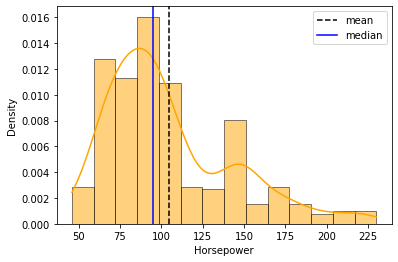

In [14]:
# sağa doğru kuyruk var, positive skewness
%matplotlib inline
sns.histplot(data.Horsepower, color="orange", kde=True, stat="density", linewidth = 0.5)
plt.axvline(data.Horsepower.mean(), color='k', label="mean", linestyle='--', linewidth = 1.5)
plt.axvline(data.Horsepower.median(), color='b', label="median", linestyle='-', linewidth = 1.5)
plt.legend()
plt.show()

### B) EDA
    i. correlation matrix
Birbiriyle yüksek ilişkisi olan örneğin 5 feature "multicollinearity" özelliği vardır. Burada 5 featureı incelemek yerine 1 tanesi ele alınır.

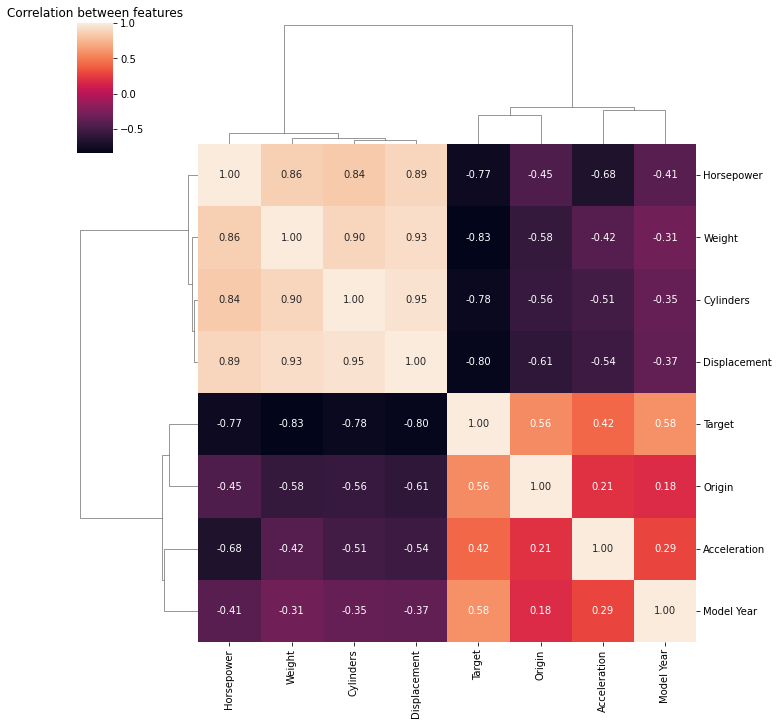

In [15]:
%matplotlib inline
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between features")
plt.show()

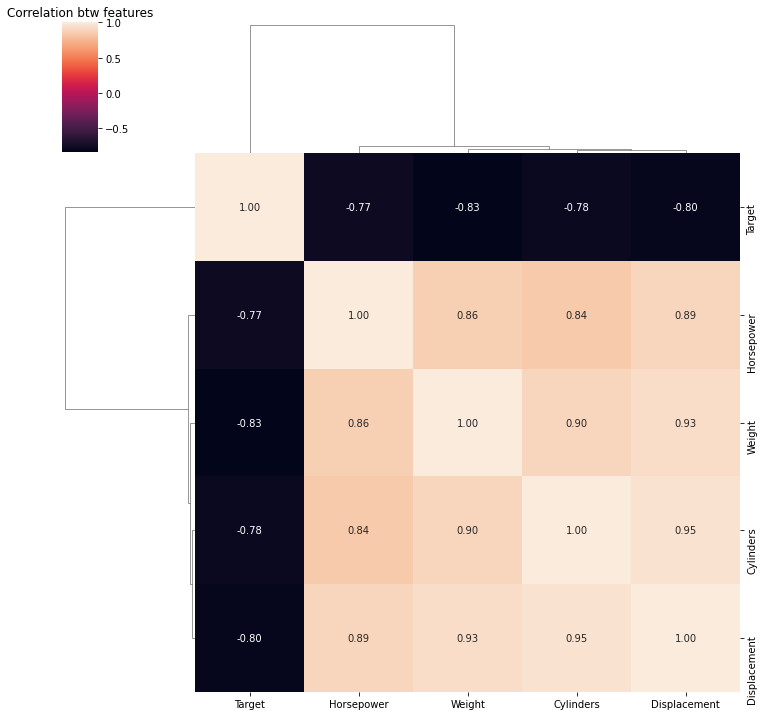

In [16]:
threshold = 0.75
filter = np.abs(corr_matrix["Target"]) > threshold
corr_features = corr_matrix.columns[filter].tolist()

sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

In [17]:
%matplotlib qt5
sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()

    ii. CountPlot

Aşağıdaki plota göre:
- cylinders and origin can be categorical (feature engineering).

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64
1    249
3     79
2     70
Name: Origin, dtype: int64


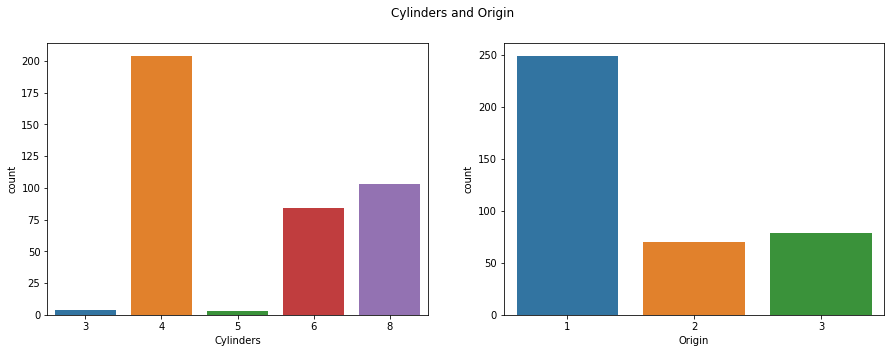

In [18]:
%matplotlib inline
fig, ax =  plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Cylinders and Origin')
sns.countplot(x = data["Cylinders"], ax = ax[0])
sns.countplot(x = data["Origin"], ax = ax[1])
print(data["Cylinders"].value_counts())
print(data["Origin"].value_counts())

    iii. BoxPlot

In [19]:
data.columns

Index(['Target', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

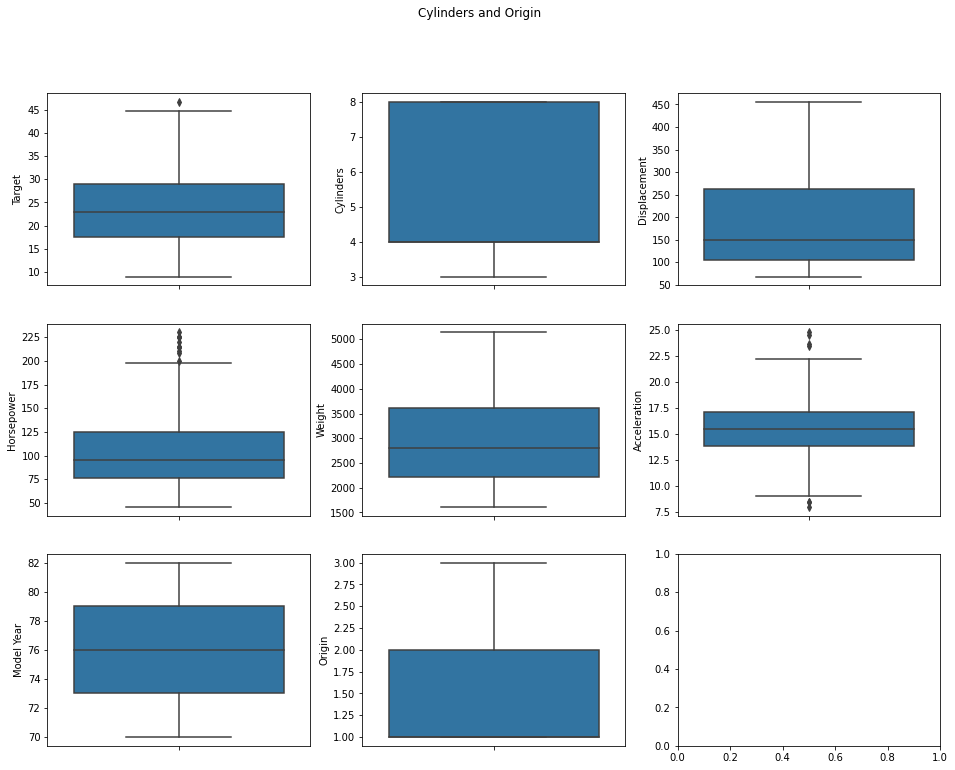

In [20]:
fig, ax =  plt.subplots(3,3,figsize=(16,12))
for i, c in enumerate(data.columns):
    fig.suptitle('Cylinders and Origin')
    # 0,1,2
    # 3,4,5
    # 6,7,8
    
    if(i<3):
        sns.boxplot(y = c, data = data, orient = "v", ax = ax[0][i])
    elif((i>2) & (i<6)):
        sns.boxplot(y = c, data = data, orient = "v", ax = ax[1][i%3])
    else:
        sns.boxplot(y = c, data = data, orient = "v", ax = ax[2][i%3])        

According box plot,
- There are **outliers** in horsepower and acceleration.

### C) Outliers

In [21]:
thr = 2
horsepower_desc = describe["Horsepower"]
horsepower_desc

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

In [22]:
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
print("Q3 = {}\nQ1 = {}\nIQR = {}\n".format(q3_hp, q1_hp, IQR_hp))

Q3 = 126.0
Q1 = 75.0
IQR = 51.0



In [23]:
data.shape

(398, 8)

In [24]:
top_limit_hp = q3_hp + thr * IQR_hp
bottom_limit_hp = q1_hp - thr * IQR_hp
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top
data = data[filter_hp]
data.shape # there is only 1 outliers

(397, 8)

In [25]:
acceleration_desc = describe["Acceleration"]
acceleration_desc

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

In [26]:
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc
print("Q3 = {}\nQ1 = {}\nIQR = {}\n".format(q3_acc, q1_acc, IQR_acc))

Q3 = 17.175
Q1 = 13.825000000000001
IQR = 3.3499999999999996



In [27]:
data.shape

(397, 8)

In [28]:
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]
filter_acc_top= data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

data = data[filter_acc] # remove Horsepower outliers
data.shape

(395, 8)

### D) Feature Engineering
    i. Skewness
<img src="img/skewness.png">

<AxesSubplot:xlabel='Target', ylabel='Density'>

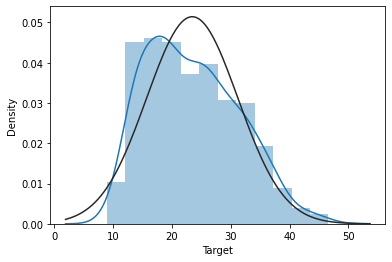

In [29]:
# target dependent variable
sns.distplot(data.Target, fit = norm)

In [30]:
(mu, sigma) = norm.fit(data["Target"]) #mu=mean, sigma=std
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 23.472405063291134, sigma = 7.756119546409932


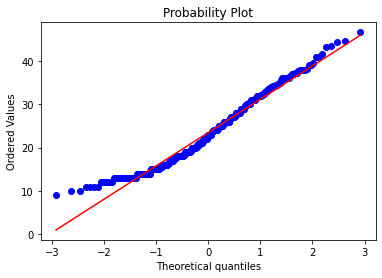

In [31]:
# qq plot # red line'ın üzerinde olması gerekir tüm verilerin.
plt.figure()
stats.probplot(data["Target"], plot = plt)
plt.show()

In [32]:
data["Target"] = np.log1p(data["Target"]) 

<AxesSubplot:xlabel='Target', ylabel='Density'>

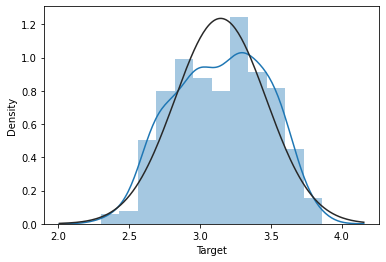

In [33]:
plt.figure()
sns.distplot(data.Target, fit = norm)

In [34]:
(mu, sigma) = norm.fit(data["Target"])
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 3.146474056830183, sigma = 0.3227569103044823


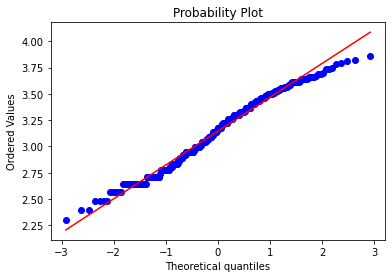

In [35]:
# qq plot
plt.figure()
stats.probplot(data["Target"], plot = plt)
plt.show()

In [36]:
# feature - independent variable 
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
Horsepower,1.067743
Origin,0.923381
Displacement,0.714682
Weight,0.533226
Cylinders,0.523374
Acceleration,0.168986
Model Year,0.013098
Target,-0.117687


-  #1 den büyükse positive skewness(horsepower), -1den küçükse negative skewness vardır.
-  Yukarıdaki sonuca göre yalnızca horspower positive skewness yaratmaktadır. 1'e çok yakın değer.

    
    ii. One Hot Encoding

<img src="img/onehot.png">

In [37]:
data["Cylinders"] = data["Cylinders"].astype(str) # to categorical(object)
data["Origin"] = data["Origin"].astype(str)
data = pd.get_dummies(data)
data.head()

,Target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


    iii. Split Data

In [38]:
x = data.drop(["Target"], axis = 1)
y = data.Target

In [39]:
test_size = 0.9 # sonuçları zorlamak için.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

    iv. Standardization

In [40]:
scaler = RobustScaler()  # RobustScaler #StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3-Create Models

### A) Linear Regression

In [41]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("LR Coef: ",lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE: ", mse)

LR Coef:  [-1.52652234e-01 -1.10059003e-01 -3.51567523e-02 -7.81023601e-02
  7.76057988e-02 -2.71614700e-01  1.86827885e-01  4.77048956e-17
  5.74192760e-02  2.73675388e-02 -1.43431578e-02 -6.77254422e-02
  8.20686000e-02]
Linear Regression MSE:  0.02098471106586966


### B) Ridge Regression (L2)

In [42]:
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5,30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [43]:
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

In [44]:
print("Ridge Coef: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE: ",mse)
print("-----------------------------------------------------------")

Ridge Coef:  [-0.07617499 -0.10434789 -0.0756786  -0.06362033  0.08849698 -0.17538752
  0.17840625  0.          0.02717488 -0.03019362 -0.02334111 -0.05192496
  0.07526607]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE:  0.018839299330570585
-----------------------------------------------------------


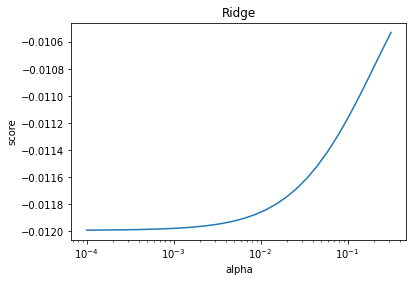

In [45]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")
plt.show()

### C) Lasso Regression(L1)

In [46]:
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [47]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [48]:
print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ", lasso)
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)
print("---------------------------------------------------------------")

Lasso Coef:  [-0.01692687 -0.10976505 -0.11721736 -0.03064576  0.09866154 -0.01243765
  0.16495225  0.          0.00378698 -0.00505995 -0.         -0.
  0.07376033]
Lasso Best Estimator:  Lasso(alpha=0.0037065129109221566, max_iter=10000, random_state=42)
Lasso MSE:  0.016597127172690827
---------------------------------------------------------------


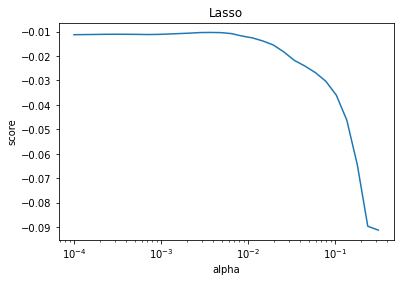

In [49]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")
plt.show()

### D) ElasticNet

In [50]:
parametersGrid = {"alpha": alphas, "l1_ratio": np.arange(0.0, 1.0, 0.05)}
eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [51]:
print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)

ElasticNet Coef:  [-0.0518437  -0.10923982 -0.09538543 -0.03946691  0.09541227 -0.07791667
  0.14374215  0.          0.         -0.01852327 -0.         -0.00200172
  0.0793579 ]
ElasticNet Best Estimator:  ElasticNet(alpha=0.014873521072935119, l1_ratio=0.15000000000000002,
           max_iter=10000, random_state=42)


In [52]:
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet MSE:  0.017234676963922245


In [53]:
"""
StandardScaler
    Linear Regression MSE:  0.020632204780133015
    Ridge MSE:  0.019725338010801216
    Lasso MSE:  0.017521594770822522
    ElasticNet MSE:  0.01749609249317252
RobustScaler:
    Linear Regression MSE:  0.020984711065869643
    Ridge MSE:  0.018839299330570554
    Lasso MSE:  0.016597127172690837
    ElasticNet MSE:  0.017234676963922273  
"""

'\nStandardScaler\n    Linear Regression MSE:  0.020632204780133015\n    Ridge MSE:  0.019725338010801216\n    Lasso MSE:  0.017521594770822522\n    ElasticNet MSE:  0.01749609249317252\nRobustScaler:\n    Linear Regression MSE:  0.020984711065869643\n    Ridge MSE:  0.018839299330570554\n    Lasso MSE:  0.016597127172690837\n    ElasticNet MSE:  0.017234676963922273  \n'

### E) XGBoost

In [54]:
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

In [55]:
model_xgb = xgb.XGBRegressor()

clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

clf.fit(X_train, Y_train)
model_xgb = clf.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [56]:
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("XGBRegressor MSE: ",mse)

XGBRegressor MSE:  0.017444718427058307


### F) Averaging Models

In [57]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  

In [58]:
averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, Y_train)

In [59]:
y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)

Averaged Models MSE:  0.01575352442013428


In [60]:
"""
StandardScaler:
    Linear Regression MSE:  0.020632204780133015
    Ridge MSE:  0.019725338010801216
    Lasso MSE:  0.017521594770822522
    ElasticNet MSE:  0.01749609249317252
    XGBRegressor MSE: 0.017167257713690008
    Averaged Models MSE: 0.016034769734972223
RobustScaler:
    Linear Regression MSE:  0.020984711065869643
    Ridge MSE:  0.018839299330570554
    Lasso MSE:  0.016597127172690837
    ElasticNet MSE:  0.017234676963922273
    XGBRegressor MSE: 0.01753270469361755
    Averaged Models MSE: 0.0156928574668921
"""

'\nStandardScaler:\n    Linear Regression MSE:  0.020632204780133015\n    Ridge MSE:  0.019725338010801216\n    Lasso MSE:  0.017521594770822522\n    ElasticNet MSE:  0.01749609249317252\n    XGBRegressor MSE: 0.017167257713690008\n    Averaged Models MSE: 0.016034769734972223\nRobustScaler:\n    Linear Regression MSE:  0.020984711065869643\n    Ridge MSE:  0.018839299330570554\n    Lasso MSE:  0.016597127172690837\n    ElasticNet MSE:  0.017234676963922273\n    XGBRegressor MSE: 0.01753270469361755\n    Averaged Models MSE: 0.0156928574668921\n'